In [43]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import re
import string

import nltk
# from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  
# stop_words = stopwords.words('english')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
https://www.kaggle.com/code/neerajmohan/nlp-text-classification-using-tf-idf-features

In [ ]:
# Dataset sinteticos

In [31]:
df = pd.read_excel('./datos.xlsx')
df["text"] = df["DescripcionCampo"].map(str) + " " + df["InfoTecnicaTablaFuenteOficial"].map(str) + " " + df["InfoTecnicaNombreCampoFuenteOficial"].map(str) + " " + df["InfoVistaNegocioTablaBVVistaNegocio"].map(str)
# Limpieza del texto
df["target"] = df["Macrodominio"].replace('Clientes', 0).replace('Canales', 1)
df.head()

,Macrodominio,Hoja,Division,DescripcionCampo,InfoTecnicaServidorFuenteOficial,InfoTecnicaBaseDatosFuenteOficial,InfoTecnicaTablaFuenteOficial,InfoTecnicaNombreCampoFuenteOficial,InfoVistaNegocioServidorVistaNegocio,InfoVistaNegocioBaseDatosVistaNegocio,InfoVistaNegocioTablaBVVistaNegocio,InfoVistaNegocioNombreCampoVistaNegocio,InfoNubeFuenteNube,text,target
0,Clientes,Detalle Campos Personas,Personas,"Es el nombre de la agencia, en donde un client...","ECBPPRQ121,11124",BDDELIVERY,INFNEG.SegmentacionSemanal,Agencia,"ECBPPRQ121,11124,",BDDELIVERY,"INFNEG.SegmentacionSemanal,","CodigoAgencia,Agencia",cur_clientes.segmentacionsemanal,"Es el nombre de la agencia, en donde un client...",0
1,Clientes,Detalle Campos Personas,Personas,Nombre de la agencia donde se creó el cliente ...,BANCS REFERENCE 10.70.136.35,FNSONLP,CUSM,HOME_BRANCH_NO,NaN,NaN,NaN,NaN,NaN,Nombre de la agencia donde se creó el cliente ...,0
2,Clientes,Detalle Campos Personas,Personas,"El valor de la marca es '1' o 'Null', '1' para...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"El valor de la marca es '1' o 'Null', '1' para...",0
3,Clientes,Detalle Campos Personas,Personas,Indica el año de fabricación del vehículo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Indica el año de fabricación del vehículo nan ...,0
4,Clientes,Detalle Campos Personas,Personas,Apellidos y nombres del Cónyuge,BANCS REFERENCE 10.70.136.35,FNSONLP,CUIN,SPOUSE_NAME,NaN,NaN,NaN,NaN,NaN,Apellidos y nombres del Cónyuge CUIN SPOUSE_NA...,0


In [27]:
sample_corpora = df['text'].iloc[:2].values
print(sample_corpora)
count_vectorizer = CountVectorizer()
wm = count_vectorizer.fit_transform(sample_corpora)

doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
feat_names = count_vectorizer.get_feature_names()

sample_df = pd.DataFrame(data=wm.toarray(), index=doc_names,columns=feat_names)
sample_df

['Es el nombre de la agencia, en donde un cliente puede gestionar sus productos bancarios. Esta agencia sirve para repartir los clientes a los asesores en procesos comerciales. El catálogo oficial de Agencia se encuentra mapeado en el dominio de Listas de Referencia INFNEG.SegmentacionSemanal Agencia INFNEG.SegmentacionSemanal,'
 'Nombre de la agencia donde se creó el cliente al inicio de la relación comercial. CUSM HOME_BRANCH_NO  nan']


c:\Users\usuario\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,agencia,al,asesores,bancarios,catálogo,cliente,clientes,comercial,comerciales,creó,...,productos,puede,referencia,relación,repartir,se,segmentacionsemanal,sirve,sus,un
Doc0,4,0,1,1,1,1,1,0,1,0,...,1,1,1,0,1,1,2,1,1,1
Doc1,1,1,0,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0


In [32]:
X_train, X_test , y_train, y_test = train_test_split(df['text'].values,df['target'].values,test_size=0.2,random_state=123,stratify=df['target'].values)

tfidf_vectorizer = TfidfVectorizer()

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)

tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

classifier = RandomForestClassifier()

classifier.fit(tfidf_train_vectors,y_train)

RandomForestClassifier()

In [44]:
y_pred = classifier.predict(tfidf_test_vectors)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.68      0.79       183
           1       0.60      0.94      0.73        93

    accuracy                           0.76       276
   macro avg       0.77      0.81      0.76       276
weighted avg       0.83      0.76      0.77       276



<AxesSubplot:>

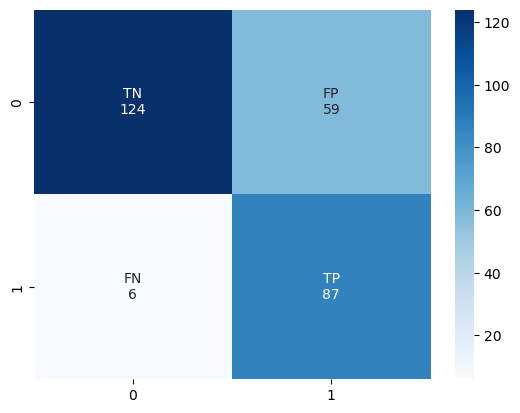

In [34]:
# LINEA BASE: 70% a ver ¿cómo se sube?
cnf_matrix = confusion_matrix(y_test,y_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues')

In [38]:
X_test

array(['Fecha en la que el cliente inició a trabajar en la empresa actual y debe ir en este formato  (dd/mm/aaaa) nan nan nan',
       'nan nan nan nan',
       'Código compuesto por letras que identifica la transacción original, por ejemplo se puede tener estos valores:,AA/VR,AE/DC,AE/VS,AX/AB,BE/VR,BI/VR,BN/CC catalogo_tipo_transaccion_canal CODIGO_TIPO_TRANSACCION_ORIGINAL catalogo_tipo_transaccion_canal',
       'Indica la condición de un cliente de ser exento o no del pago de los impuestos, y en el caso de ser exento la razón de ello nan nan nan',
       'Es el valor del monto de otros gastos en USD que pueda tener el cliente en un periodo determinado. nan nan nan',
       'nan nan nan nan',
       'Indica el código Postal de la dirección en el exterior del cliente nan nan nan',
       'nan nan nan nan', 'nan nan nan nan',
       'Es el número único de Identificación generado por el Registro Civil o SRI, de la persona de la Referencia que indicó el cliente en el momento del regist

In [39]:
my_dataset = [
    "Detalla la direccion de trabajo actualmente del cliente. CUSVAA ADD1, ADD3,ADD_REF"
]
classifier.predict(tfidf_vectorizer.transform(np.array(my_dataset)))

array([0], dtype=int64)

In [40]:
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold

In [42]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import random

X_train_flatten = []

X_train_flatten.append([[
    0,0,1
    ], 
    [1,0]])

random.shuffle(X_train_flatten)

training = np.array(X_train_flatten, dtype="object")

data_x = list(training[:, 0])
data_y = list(training[:, 1])

adam = Adam(0.001)

model = Sequential(
    layers=[
        Dense(3, activation='relu', input_shape=(3,)),
        Dense(2, activation="relu"),
        Dense(2, activation="softmax")
    ]
)

model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=['accuracy'])

# select rows for train and test
trainX = np.array(data_x)
trainY = np.array(data_y)

# fit model
history = model.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(trainX, trainY), verbose=0)
# evaluate model
_, acc = model.evaluate(trainX, trainY, verbose=0)
print('> %.3f' % (acc * 100.0))

> 100.000
